# EDA - 1  Bike Details Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = '/content/BIKE DETAILS.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
# 1. Range of selling prices
selling_price_range = (df["selling_price"].min(), df["selling_price"].max())
selling_price_range

(5000, 760000)

In [6]:
# 2. Median selling price
median_selling_price = df["selling_price"].median()
median_selling_price

45000.0

In [7]:
# 3. Most common seller type
most_common_seller_type = df["seller_type"].mode()[0]
most_common_seller_type

'Individual'

In [8]:
# 4. Number of bikes driven more than 50,000 km
bikes_above_50k_km = df[df["km_driven"] > 50000].shape[0]
bikes_above_50k_km

170

In [9]:
# 5. Average km_driven for each ownership type
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()
avg_km_per_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [10]:
# 6. Proportion of bikes from 2015 or older
bikes_2015_or_older = (df[df["year"] <= 2015].shape[0] / len(df)) * 100
bikes_2015_or_older

56.64467483506126

In [12]:
# 7. Missing values trend
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [13]:
# 8. Highest ex_showroom_price and corresponding bike name
highest_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_highest_price = df[df["ex_showroom_price"] == highest_ex_showroom_price]["name"].values
bike_with_highest_price

array(['Harley-Davidson Street Bob'], dtype=object)

In [15]:
# 9. Total number of bikes listed by each seller type
bikes_per_seller_type = df["seller_type"].value_counts()
selling_price_range, median_selling_price, most_common_seller_type, bikes_above_50k_km, avg_km_per_owner, bikes_2015_or_older, missing_values, highest_ex_showroom_price, bike_with_highest_price, bikes_per_seller_type


((5000, 760000),
 45000.0,
 'Individual',
 170,
 owner
 1st owner     32816.583333
 2nd owner     39288.991870
 3rd owner     33292.181818
 4th owner    311500.000000
 Name: km_driven, dtype: float64,
 56.64467483506126,
 name                   0
 selling_price          0
 year                   0
 seller_type            0
 owner                  0
 km_driven              0
 ex_showroom_price    435
 dtype: int64,
 1278000.0,
 array(['Harley-Davidson Street Bob'], dtype=object),
 seller_type
 Individual    1055
 Dealer           6
 Name: count, dtype: int64)

In [16]:
# 10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]
correlation_first_owner = first_owner_bikes["selling_price"].corr(first_owner_bikes["km_driven"])
correlation_first_owner

-0.2434817484496572

In [18]:
# 11. Identify and remove outliers in km_driven using IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
df_no_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


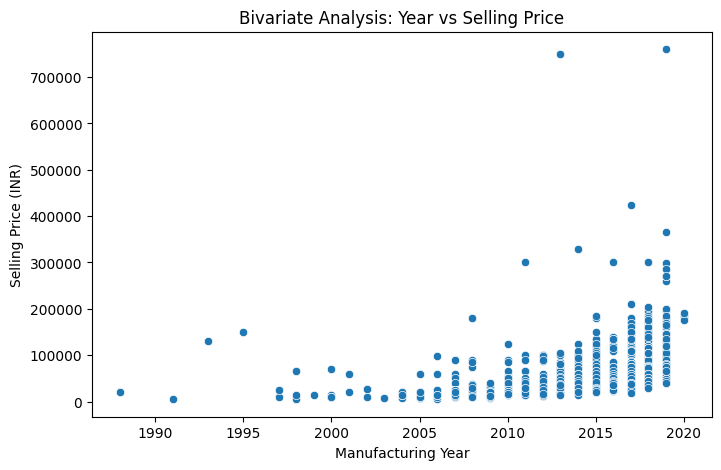

In [19]:
# 12. Bivariate analysis: Year vs. Selling Price (scatter plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="year", y="selling_price")
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.show()

In [21]:
# 13. Average depreciation in selling price based on bike's age
current_year = 2025  # Assuming the current year is 2025
df["bike_age"] = current_year - df["year"]
avg_depreciation_per_year = df.groupby("bike_age")["selling_price"].mean()
avg_depreciation_per_year

,selling_price
bike_age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


In [22]:
# 14. Bikes priced significantly above the average for their manufacturing year
yearly_avg_price = df.groupby("year")["selling_price"].mean()
df_above_avg = df[df.apply(lambda row: row["selling_price"] > yearly_avg_price[row["year"]], axis=1)]
bikes_above_avg = df_above_avg[["name", "year", "selling_price"]].head(10)
bikes_above_avg

,name,year,selling_price
0,Royal Enfield Classic 350,2019,175000
2,Royal Enfield Classic Gunmetal Grey,2018,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,65000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
14,Jawa 42,2020,185000
16,Hero Honda Glamour,2006,25000
17,Yamaha YZF R15 S,2010,40000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
19,Yamaha FZ25,2018,120000


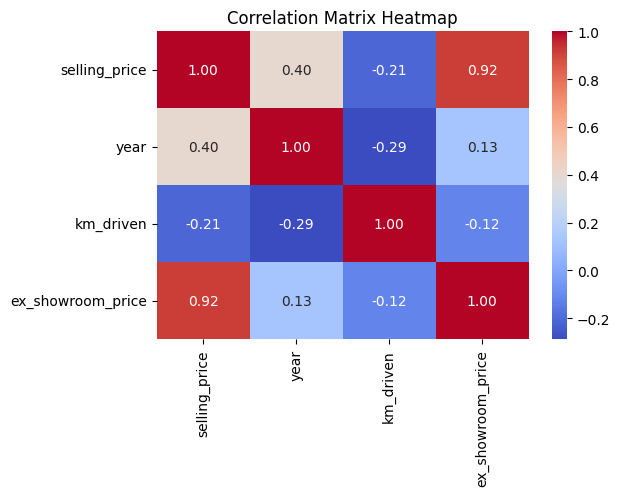

In [26]:
# 15. Correlation matrix for numeric columns and heatmap visualization
correlation_matrix = df[["selling_price", "year", "km_driven", "ex_showroom_price"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# EDA - 2 Car Sale Dataset


In [31]:
path = '/content/Car Sale.csv'
car_df = pd.read_csv(path)

In [32]:
car_df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [33]:
# 1. Average selling price of cars for each dealer
avg_price_per_dealer = car_df.groupby("Dealer_Name")["Price ($)"].mean()
avg_price_per_dealer

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [35]:
# 2. Car brand with the highest price variation
price_variation_per_brand = car_df.groupby("Company")["Price ($)"].std().idxmax()
highest_variation = car_df.groupby("Company")["Price ($)"].std().max()
price_variation_per_brand, highest_variation

('Lincoln', 19658.050211265567)

In [36]:
# 3. Distribution of car prices for each transmission type
transmission_price_distribution = car_df.groupby("Transmission")["Price ($)"].describe()
transmission_price_distribution

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [37]:
# 4. Distribution of car prices across different regions
region_price_distribution = car_df.groupby("Dealer_Region")["Price ($)"].describe()
region_price_distribution

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [38]:
# 5. Distribution of cars based on body styles
body_style_distribution = car_df["Body Style"].value_counts()
body_style_distribution

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [39]:
# 6. Average selling price variation by customer gender and annual income
avg_price_by_gender = car_df.groupby("Gender")["Price ($)"].mean()
income_price_corr = car_df["Annual Income"].corr(car_df["Price ($)"])

avg_price_per_dealer.head(), price_variation_per_brand, highest_variation, transmission_price_distribution, region_price_distribution, body_style_distribution, avg_price_by_gender, income_price_corr

(Dealer_Name
 Buddy Storbeck's Diesel Service Inc    27217.261563
 C & M Motors Inc                       28111.755200
 Capitol KIA                            28189.703822
 Chrysler Plymouth                      27555.526400
 Chrysler of Tri-Cities                 28123.091054
 Name: Price ($), dtype: float64,
 'Lincoln',
 19658.050211265567,
                 count          mean           std     min      25%      50%  \
 Transmission                                                                  
 Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
 Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   
 
                   75%      max  
 Transmission                    
 Auto          35500.0  75700.0  
 Manual        34000.0  85800.0  ,
                 count          mean           std     min      25%      50%  \
 Dealer_Region                                                                 
 Aurora         3130.0  28334.626837

In [40]:
# 7. Distribution of car prices by region and number of cars sold by region
cars_sold_per_region = car_df["Dealer_Region"].value_counts()
cars_sold_per_region

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


In [41]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_per_engine = car_df.groupby("Engine")["Price ($)"].mean()
avg_price_per_engine

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [42]:
# 9. How do car prices vary based on the customer’s annual income bracket?
car_df["Income Bracket"] = pd.qcut(car_df["Annual Income"], q=4, labels=["Low", "Medium", "High", "Very High"])
avg_price_per_income_bracket = car_df.groupby("Income Bracket")["Price ($)"].mean()
avg_price_per_income_bracket

<ipython-input-42-2c1cb0c7f1f5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_income_bracket = car_df.groupby("Income Bracket")["Price ($)"].mean()


,Price ($)
Income Bracket,
Low,27954.276468
Medium,27974.380371
High,28288.664936
Very High,28144.058223


In [43]:
# 10. Top 5 car models with highest number of sales and their price distribution
top_5_models = car_df["Model"].value_counts().head(5)
top_5_models_price_distribution = car_df[car_df["Model"].isin(top_5_models.index)].groupby("Model")["Price ($)"].describe()
top_5_models, top_5_models_price_distribution

(Model
 Diamante      418
 Silhouette    411
 Prizm         411
 Passat        391
 Ram Pickup    383
 Name: count, dtype: int64,
             count          mean           std      min      25%      50%  \
 Model                                                                      
 Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
 Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
 Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
 Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
 Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   
 
                 75%      max  
 Model                         
 Diamante    22000.0  49801.0  
 Passat      27001.0  32501.0  
 Prizm       25000.0  44700.0  
 Ram Pickup  39300.0  57750.0  
 Silhouette  34500.0  60750.0  )

In [44]:
# 11. Car price variation based on engine size and car color
engine_color_price_variation = car_df.groupby(["Engine", "Color"])["Price ($)"].mean().unstack()
engine_color_price_variation

Color,Black,Pale White,Red
Engine,,,
DoubleÂ Overhead Camshaft,25766.451103,30347.987460,27434.392314
Overhead Camshaft,31732.967164,24327.767694,30153.405229


In [45]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
car_df["Date"] = pd.to_datetime(car_df["Date"])
car_df["Month"] = car_df["Date"].dt.month
monthly_sales_trend = car_df.groupby("Month")["Car_id"].count()
monthly_sales_trend

,Car_id
Month,
1,790
2,735
3,1535
4,1655
5,1895
6,1715
7,1725
8,1705
9,3305


In [46]:
# 13. Car price distribution based on body style and transmission type
body_transmission_price_distribution = car_df.groupby(["Body Style", "Transmission"])["Price ($)"].mean().unstack()
body_transmission_price_distribution

Transmission,Auto,Manual
Body Style,,
Hardtop,31520.188210,27016.943698
Hatchback,25910.544824,28702.550562
Passenger,28915.835149,28969.521039
SUV,27501.404407,26079.019161
Sedan,29955.294344,29664.271572


In [47]:
# 14. Correlation between car price, engine size, and annual income of customers
price_income_corr = car_df[["Price ($)", "Annual Income"]].corr()
price_income_corr

,Price ($),Annual Income
Price ($),1.000000,0.012065
Annual Income,0.012065,1.000000


In [50]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_per_model_engine = car_df.groupby(["Model", "Engine"])["Price ($)"].mean().unstack()
avg_price_per_model_engine

Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


# EDA - 3 Amazon Sales

In [51]:
path = '/content/amazon.csv'
amazon_df = pd.read_csv(path)

In [52]:
amazon_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [53]:
# Cleaning numeric columns by removing symbols and converting to float
amazon_df["discounted_price"] = amazon_df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
amazon_df["actual_price"] = amazon_df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
amazon_df["discount_percentage"] = amazon_df["discount_percentage"].str.replace("%", "").astype(float)
amazon_df["rating"] = pd.to_numeric(amazon_df["rating"], errors="coerce")
amazon_df["rating_count"] = amazon_df["rating_count"].str.replace(",", "").astype(float)

In [55]:
# 1. Average rating for each product category
avg_rating_per_category = amazon_df.groupby("category")["rating"].mean()
avg_rating_per_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [56]:
# 2. Top rating_count products by category
top_rated_products = amazon_df.sort_values(by="rating_count", ascending=False).groupby("category").head(1)
top_rated_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69.0,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,999.0,62.0,4.1,363713.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...
370,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,8499.0,10999.0,23.0,4.1,313836.0,Processor: Octa-core Helio G35 and upto 2.3GHz...,"AF7B5AJJZP2WKRD74Z45L7YDOEHA,AGEYI2JEUE752XDEX...","Roshan Renji Cherian,SivavaraprasadPV,Kranthi,...","RCP907FSHW2CI,R2XSNFIDSF8IL4,R2JB9PO5MV9LER,R1...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,https://m.media-amazon.com/images/I/416SpYgTVY...,https://www.amazon.in/Redmi-Activ-Carbon-Black...
1028,B01LWYDEQ7,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,199.0,495.0,60.0,4.1,270563.0,Unique string function to chop vegetables and ...,"AGJTPXSZDYEWZM76UMJXCHUUPJSQ,AH4ON4ZDRHM5PWVW6...","Harshit,Fazeela,Chiranjiv Singh,Joseph Ka,Rohi...","R284SZGRNQQXYS,R3O2GOW05S3YSF,R28FXK3KNQP51T,R...","Nice chopper,Small easy use n clean,Not good,G...","1st product came faulty got it replaced , repl...",https://m.media-amazon.com/images/I/41cVgYgAKp...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...
588,B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories|ExternalDevices&DataStor...,289.0,650.0,56.0,4.3,253105.0,"Ultra-compact and portable USB flash drive,Cap...","AFNMA3FQAONYMREOFLNYF2RV4AOA,AHAYDWCGM4QNXWBCR...","RAJIV D.,Antony Gruz,ajay,Praveen kumar,Sujoy ...","R2XCI5KR2H8QEI,R3BNQCB05PYZMV,RVXXO15AGASNX,R1...","Good product,Affordable,Good,Reding speed is o...","Very chip very good,Really happy to buy this p...",https://m.media-amazon.com/images/I/310mw9KTJv...,https://www.amazon.in/SanDisk-Cruzer-Blade-Fla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,B0BDS8MY8J,"Lapster Caddy for ssd and HDD, Optical Bay 2nd...",Computers&Accessories|Components|InternalHardD...,199.0,999.0,80.0,4.2,362.0,Compatible 4 Channels switch help to improve t...,"AF52SZE3RZ4OMSOTV2XLI7FOVKMA,AH3M2HOCS7VMTXCOY...","Digvijay,Vismay,Yogesh,Rajesh K.,Yogesh Dhurve...","R1WLBATEAWUA8W,R39NO1SN8E0IFY,R2HHNNLIN82NKF,R...","🌟🌟🌟🌟,Good product,Nice product,Product quality...",GO FOR IT BUT I MADE SOME CHANGES TO FIX MY DV...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Lapster-Caddy-Optical-Dr...
1014,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,37247.0,59890.0,38.0,4.0,323.0,Processor: 11th Gen Intel Core i3-1115G4 | Spe...,"AF5IDL42LBZCZ7A5YDGM2QFNUHEQ,AHPQHJVDA6JHFNRN7...","Mb,Amazon Customer,Adnan Malik,AD,Pradeep Rajb...","R2WGS6Q7F9F4Y5,R1VS2WU12H9Z2C,RMPKJJKZC848Y,R4...","Value for money laptop for normal usage,Works ...",If 

In [57]:
# 3. Distribution of discounted prices vs. actual prices
price_distribution = amazon_df[["discounted_price", "actual_price"]].describe()
price_distribution

,discounted_price,actual_price
count,1465.000000,1465.000000
mean,3125.310874,5444.990635
std,6944.304394,10874.826864
min,39.000000,39.000000
25%,325.000000,800.000000
50%,799.000000,1650.000000
75%,1999.000000,4295.000000
max,77990.000000,139900.000000


In [58]:
# 4. Average discount percentage across categories
avg_discount_per_category = amazon_df.groupby("category")["discount_percentage"].mean()
avg_discount_per_category

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


In [59]:
# 5. Most popular product names (highest rating_count)
most_popular_products = amazon_df.sort_values(by="rating_count", ascending=False)[["product_name", "rating_count"]].head(5)
most_popular_products

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0


In [60]:
# 6. Most popular product keywords (common words in product names)
from collections import Counter
import itertools

words = list(itertools.chain(*[name.split() for name in amazon_df["product_name"].dropna()]))
most_common_words = Counter(words).most_common(10)
most_common_words

[('with', 718),
 ('for', 614),
 ('|', 457),
 ('&', 432),
 ('USB', 342),
 ('and', 310),
 ('Cable', 306),
 ('-', 220),
 ('Charging', 212),
 ('Fast', 208)]

In [61]:
# 7. Most popular product reviews (highest rating_count)
most_popular_reviews = amazon_df.sort_values(by="rating_count", ascending=False)[["review_title", "rating_count"]].head(5)
most_popular_reviews

,review_title,rating_count
12,"It's quite good and value for money,Works well...",426973.0
65,"It's quite good and value for money,Works well...",426973.0
47,"It's quite good and value for money,Works well...",426973.0
684,"It's quite good and value for money,Works well...",426972.0
400,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0


In [62]:
# 8. Correlation between discounted_price and rating
price_rating_corr = amazon_df[["discounted_price", "rating"]].corr()
price_rating_corr

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [63]:
# 9. Top 5 categories based on highest ratings
top_categories_by_rating = amazon_df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)
top_categories_by_rating

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


In [64]:
# 10. Identify potential areas for improvement based on data analysis (e.g., low-rated categories)
lowest_rated_categories = amazon_df.groupby("category")["rating"].mean().sort_values().head(5)
lowest_rated_categories

,rating
category,
"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders",3.3
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",3.4
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
"Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters",3.6


# EDA - 4 Spotify Data

In [65]:
path = '/content/spotify.csv'
spotify_df = pd.read_csv(path)

In [66]:
spotify_df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [67]:
# 1. Average popularity of songs per artist
avg_popularity_per_artist = spotify_df.groupby("Artist")["Popularity"].mean()
avg_popularity_per_artist

,Popularity
Artist,
*NSYNC,67.000000
2 Chainz,72.000000
21 Savage,84.181818
A Boogie Wit da Hoodie,80.000000
A$AP Ferg,69.000000
...,...
Young Nudy,67.000000
Young Thug,73.750000
benny blanco,72.000000


In [68]:
# 2. Top 5 most popular songs
top_5_songs = spotify_df.sort_values(by="Popularity", ascending=False)[["Track Name", "Artist", "Popularity"]].head(5)
top_5_songs

,Track Name,Artist,Popularity
40,Lovin On Me,Jack Harlow,97
280,CARNIVAL,¥$,96
70,redrum,21 Savage,96
260,CARNIVAL,¥$,96
30,FE!N (feat. Playboi Carti),Travis Scott,93


In [69]:
# 3. Distribution of song durations
duration_distribution = spotify_df["Duration (ms)"].describe()
duration_distribution

,Duration (ms)
count,440.000000
mean,206810.040909
std,53576.930289
min,81666.000000
25%,172778.500000
50%,201866.000000
75%,235119.750000
max,501648.000000


In [70]:
# 4. Correlation between popularity and duration
popularity_duration_corr = spotify_df[["Popularity", "Duration (ms)"]].corr()
popularity_duration_corr

,Popularity,Duration (ms)
Popularity,1.000000,0.040745
Duration (ms),0.040745,1.000000


In [71]:
# 5. Most frequently occurring artists in the dataset
most_common_artists = spotify_df["Artist"].value_counts().head(5)
most_common_artists

,count
Artist,
Drake,20
Travis Scott,12
21 Savage,11
¥$,11
Lil Nas X,11


In [72]:
# 6. Longest and shortest songs
longest_song = spotify_df.loc[spotify_df["Duration (ms)"].idxmax(), ["Track Name", "Artist", "Duration (ms)"]]
shortest_song = spotify_df.loc[spotify_df["Duration (ms)"].idxmin(), ["Track Name", "Artist", "Duration (ms)"]]
longest_song, shortest_song

(Track Name       GOD DID (feat. Rick Ross, Lil Wayne, Jay-Z, Jo...
 Artist                                                   DJ Khaled
 Duration (ms)                                               501648
 Name: 419, dtype: object,
 Track Name          BroZone's Back
 Artist           Justin Timberlake
 Duration (ms)                81666
 Name: 362, dtype: object)

In [74]:
# 7. Artists with the highest average popularity
top_artists_by_popularity = avg_popularity_per_artist.sort_values(ascending=False).head(5)
top_artists_by_popularity

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


In [75]:
# 8. Count of songs above a certain popularity threshold (e.g., 80)
popular_songs_count = (spotify_df["Popularity"] > 80).sum()
popular_songs_count

151

In [76]:
# 9. Distribution of song popularity
popularity_distribution = spotify_df["Popularity"].describe()
popularity_distribution

,Popularity
count,440.000000
mean,75.736364
std,9.886534
min,29.000000
25%,70.000000
50%,77.000000
75%,83.000000
max,97.000000


In [77]:
# 10. Most popular songs per artist
most_popular_songs_per_artist = spotify_df.loc[spotify_df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]]
most_popular_songs_per_artist

,Artist,Track Name,Popularity
369,*NSYNC,Better Place (Reunion),67
345,2 Chainz,We Own It (Fast & Furious),72
70,21 Savage,redrum,96
391,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),80
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69
...,...,...,...
156,Young Nudy,Peaches & Eggplants (feat. Latto & Sexyy Red),67
174,Young Thug,Hot (Remix) [feat. Gunna and Travis Scott],76
167,benny blanco,Bad Decisions (with BTS & Snoop Dogg),72
140,cassö,Prada,92
